Web Scraping, Data Cleaning and EDA


1. Data Science Workflow

2. Webscrapping from IMDB


3. Save the scraped data

4. Perform EDA

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Problem Statement / Tasks
#Retriving movie information from IMDB website from year 2015 to 2019
#The Information that we are going to extract
#1. name of the movie
#2. year
#3. rating
#4. meta critic score
#5. number of votes
#6. genre
#7. gross collection

#Answer the below question and visualize
#1. Top five movies by net collection
#2. group the movies by genre and get the mean values of numeric records
#3. Which genre tends attract highest rating?
#4. How are the features related to each other?
#5. High rated movies tend to attract more votes
#6. how gross income of the movies fare genre wise?

In [3]:
#Will scrap the movie information from the IMDB website
#Webscraping - this technique focues on the transformation of unstructured data(HTML format) on the web into structured data (database or spreadsheet)
#When to use - It is used in the absence of API services or if API does not provide adequate information

In [4]:
#Importing necessary packages
#BeautifulSoup - is a python lib for pulling data out of HTML and XML files
#requests - python module used to send https requests
#re - module to work with regular expression
from bs4 import BeautifulSoup
from requests import get
import re
import numpy as np

In [5]:
#Getting the unstructures data
url='https://www.imdb.com/search/title?release_date=2017&sort=num_votes,desc&start=1'
html=get(url)

In [6]:
html

<Response [200]>

In [7]:
html.content

b'\n\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n\n        <meta charset="utf-8">\n\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n        <title>Released between 2017-01-01 and 2017-12-31\n(Sorted by Number of Votes Descending) - IMDb</title>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>\n<script>\n    if (typeof uet == \'function\') {\n      uet("be", "LoadTitle", {wb: 1});\n    }\n</script>\n<script>\n    if (typeof uex == \'function\') {\n      uex("ld", "LoadTitle", {wb: 1});\n    }\n</script>\n\n        <link rel="canon

In [8]:
#Converting it into beautifulsoup object and viewing raw html page
soup=BeautifulSoup(html.content, 'html.parser')
print(type(soup))
print(soup.prettify())

<class 'bs4.BeautifulSoup'>
<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <title>
   Released between 2017-01-01 and 2017-12-31
(Sorted by Number of Votes Descending) - IMDb
  </title>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
  </script>
  <link href="https://www.imdb.com/search/title/?rel

In [9]:
movie_divs=soup.find_all('div' ,class_="lister-item mode-advanced")
movie_divs

[<div class="lister-item mode-advanced">
 <div class="lister-top-right">
 <div class="ribbonize" data-caller="filmosearch" data-tconst="tt3315342"></div>
 </div>
 <div class="lister-item-image float-left">
 <a href="/title/tt3315342/"> <img alt="Logan" class="loadlate" data-tconst="tt3315342" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BYzc5MTU4N2EtYTkyMi00NjdhLTg3NWEtMTY4OTEyMzJhZTAzXkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png" width="67"/>
 </a> </div>
 <div class="lister-item-content">
 <h3 class="lister-item-header">
 <span class="lister-item-index unbold text-primary">1.</span>
 <a href="/title/tt3315342/">Logan</a>
 <span class="lister-item-year text-muted unbold">(2017)</span>
 </h3>
 <p class="text-muted ">
 <span class="certificate">R</span>
 <span class="ghost">|</span>
 <span class="runtime">137 min</span>
 <span class="ghost">|</span>
 <span class="genre">
 Action, Drama, Sci-Fi

In [10]:
movie=movie_divs[0]
print(movie.prettify())

<div class="lister-item mode-advanced">
 <div class="lister-top-right">
  <div class="ribbonize" data-caller="filmosearch" data-tconst="tt3315342">
  </div>
 </div>
 <div class="lister-item-image float-left">
  <a href="/title/tt3315342/">
   <img alt="Logan" class="loadlate" data-tconst="tt3315342" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BYzc5MTU4N2EtYTkyMi00NjdhLTg3NWEtMTY4OTEyMzJhZTAzXkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png" width="67"/>
  </a>
 </div>
 <div class="lister-item-content">
  <h3 class="lister-item-header">
   <span class="lister-item-index unbold text-primary">
    1.
   </span>
   <a href="/title/tt3315342/">
    Logan
   </a>
   <span class="lister-item-year text-muted unbold">
    (2017)
   </span>
  </h3>
  <p class="text-muted ">
   <span class="certificate">
    R
   </span>
   <span class="ghost">
    |
   </span>
   <span class="runtime">
    137 min
   </sp

In [11]:
#Extracting the elements of interest (Movie name)
print("Movie name tag: {}".format(movie.h3.a))
print("Movie name: {}".format(movie.h3.a.text))

Movie name tag: <a href="/title/tt3315342/">Logan</a>
Movie name: Logan


In [12]:
print("Movie name: {}".format(movie.find("h3").find("a").text))

Movie name: Logan


In [13]:
#Prevent extracting info from not existing record
def return_text(object):
  return None if not(object) else object.text

In [14]:
#movie rating
rating_tag=movie.find('strong')
print("rating",rating_tag)
print("rating: {}".format(return_text(rating_tag)))

rating <strong>8.1</strong>
rating: 8.1


In [15]:
#meta critic
print('critic: ',return_text(movie.find('span', class_='metascore favorable')))

critic:  77        


In [16]:
movie.find('span', attrs={"name":"nv"})

<span data-value="773278" name="nv">773,278</span>

In [17]:
#numbr of votes
print("votes: ",movie.find('span',attrs={'name':'nv'})["data-value"])

votes:  773278


In [18]:
#runtime
print("genre:", return_text(movie.find("span", class_="genre")))

genre: 
Action, Drama, Sci-Fi            


In [19]:
#What if two elements have same property
movie.find_all("span",class_="text-muted")

[<span class="lister-item-year text-muted unbold">(2017)</span>,
 <span class="text-muted">Votes:</span>,
 <span class="text-muted">Gross:</span>]

In [20]:
def get_gross(movie):
  arr=movie.find_all("span",class_="text-muted")
  for tag in arr:
    if tag.text=="Gross":
      return tag.find_next_sibling('span').text
  return None

print("gross collection:", get_gross(movie))

gross collection: None


In [21]:
#Deifining fuc to return all the movie containers in the given page
def get_movie_divs(url):
  html=get(url)
  soup=BeautifulSoup(html.content,"html.parser")
  movie_divs=soup.find_all('div',class_="lister-item mode-advanced")
  return movie_divs

In [21]:
#retrivinng movie information from IMDB website from year 2015 to 2019
#the information that we are going to extract
#name of the movie
#year
#rating
#meta critic score
#number of votes
#movie runtime
#genre
#gross collection

In [22]:
from time import sleep
from random import randint

movie_name=[]
movie_rating=[]
meta_critic=[]
votes=[]
runtime=[]
genre=[]
gross=[]
year_r=[]
for year in range(2015,2020):
  print(year)
  for page in range(1,250,50):
    url="http://www.imdb.com/search/title?release_date="+str(year)+"&sort=num_votes,desc&start="+str(page)
    movie_divs=get_movie_divs(url)
    for movie in movie_divs:
      if movie.find("small","text-primary unbold"):
        continue
      movie_name.append(return_text(movie.h3.a))
      year_r.append(year)
      movie_rating.append(return_text(movie.find("strong")))
      #meta_critic.append(return_text(movie.find("span",class="metascore favorable")))
      votes.append(movie.find('span',attrs={"name":"nv"})["data-value"])
      #runtime.append(return_text(movie.find("span", class="runtime")))
      genre.append(return_text(movie.find("span", class_="genre")))
      gross.append(get_gross(movie))

2015
2016
2017
2018
2019


In [23]:
movie_name[:10]

['Mad Max: Fury Road',
 'Star Wars: Episode VII - The Force Awakens',
 'Avengers: Age of Ultron',
 'The Martian',
 'The Revenant',
 'Inside Out',
 'Ant-Man',
 'Jurassic World',
 'The Hateful Eight',
 'Better Call Saul']

In [24]:
#Converting into structured data
import pandas as pd

In [37]:
data={"name":movie_name,"year":year_r,"genre":genre,"rating":movie_rating,"votes":votes,"gross":gross}

movie=pd.DataFrame(data, columns=["name","year","genre","rating","votes","gross"])
movie.head()

,name,year,genre,rating,votes,gross
0,Mad Max: Fury Road,2015,"\nAction, Adventure, Sci-Fi",8.1,1014108,None
1,Star Wars: Episode VII - The Force Awakens,2015,"\nAction, Adventure, Sci-Fi",7.8,937975,None
2,Avengers: Age of Ultron,2015,"\nAction, Adventure, Sci-Fi",7.3,872683,None
3,The Martian,2015,"\nAdventure, Drama, Sci-Fi",8.0,865702,None
4,The Revenant,2015,"\nAction, Adventure, Drama",8.0,815232,None


In [26]:
#Cleaning the data

In [38]:
#Checking the null values
df=movie
df[df.isna().any(axis=1)]

,name,year,genre,rating,votes,gross
0,Mad Max: Fury Road,2015,"\nAction, Adventure, Sci-Fi",8.1,1014108,None
1,Star Wars: Episode VII - The Force Awakens,2015,"\nAction, Adventure, Sci-Fi",7.8,937975,None
2,Avengers: Age of Ultron,2015,"\nAction, Adventure, Sci-Fi",7.3,872683,None
3,The Martian,2015,"\nAdventure, Drama, Sci-Fi",8.0,865702,None
4,The Revenant,2015,"\nAction, Adventure, Drama",8.0,815232,None
...,...,...,...,...,...,...
1175,The Act,2019,"\nBiography, Crime, Drama",7.9,29234,None
1176,Badla,2019,"\nCrime, Drama, Mystery",7.8,28934,None
1177,Jexi,2019,"\nComedy, Romance, Sci-Fi",6.0,28804,None
1178,What Men Want,2019,"\nComedy, Fantasy, Romance",5.3,28594,None


In [39]:
df.isna()

,name,year,genre,rating,votes,gross
0,False,False,False,False,False,True
1,False,False,False,False,False,True
2,False,False,False,False,False,True
3,False,False,False,False,False,True
4,False,False,False,False,False,True
...,...,...,...,...,...,...
1175,False,False,False,False,False,True
1176,False,False,False,False,False,True
1177,False,False,False,False,False,True
1178,False,False,False,False,False,True


In [40]:
#Checking for number of null values
df.isnull().sum()

name         0
year         0
genre        0
rating       0
votes        0
gross     1180
dtype: int64

In [47]:
df=df[['name','year','genre','rating','votes']]
df

,name,year,genre,rating,votes
0,Mad Max: Fury Road,2015,"\nAction, Adventure, Sci-Fi",8.1,1014108
1,Star Wars: Episode VII - The Force Awakens,2015,"\nAction, Adventure, Sci-Fi",7.8,937975
2,Avengers: Age of Ultron,2015,"\nAction, Adventure, Sci-Fi",7.3,872683
3,The Martian,2015,"\nAdventure, Drama, Sci-Fi",8.0,865702
4,The Revenant,2015,"\nAction, Adventure, Drama",8.0,815232
...,...,...,...,...,...
1175,The Act,2019,"\nBiography, Crime, Drama",7.9,29234
1176,Badla,2019,"\nCrime, Drama, Mystery",7.8,28934
1177,Jexi,2019,"\nComedy, Romance, Sci-Fi",6.0,28804
1178,What Men Want,2019,"\nComedy, Fantasy, Romance",5.3,28594


In [48]:
df.isnull().sum()

name      0
year      0
genre     0
rating    0
votes     0
dtype: int64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1180 entries, 0 to 1179
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    1180 non-null   object
 1   year    1180 non-null   int64 
 2   genre   1180 non-null   object
 3   rating  1180 non-null   object
 4   votes   1180 non-null   object
dtypes: int64(1), object(4)
memory usage: 46.2+ KB


In [50]:
df['genre']=df['genre'].apply(lambda x: x.split(',')[0].strip())

In [51]:
df.head()

,name,year,genre,rating,votes
0,Mad Max: Fury Road,2015,Action,8.1,1014108
1,Star Wars: Episode VII - The Force Awakens,2015,Action,7.8,937975
2,Avengers: Age of Ultron,2015,Action,7.3,872683
3,The Martian,2015,Adventure,8.0,865702
4,The Revenant,2015,Action,8.0,815232


In [52]:
#Using regex to extract only digits
def strip_runtime(runtime):
  if runtime:
    return re.findall(r'\d+',runtime)[0]
  return None

print("runtime: ",strip_runtime("155 min"))

runtime:  155


In [53]:
def strip_gross(gross):
  if gross:
    return re.findall(r'[\d+\.]+',gross)[0]
  return None

print("gross: ",strip_gross("$187.71M"))

gross:  187.71


In [55]:
#Type Casting
df['rating']=df['rating'].astype('float')

df['votes']=df['votes'].astype('int')

In [56]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1180 entries, 0 to 1179
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    1180 non-null   object 
 1   year    1180 non-null   int64  
 2   genre   1180 non-null   object 
 3   rating  1180 non-null   float64
 4   votes   1180 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 46.2+ KB
None


,name,year,genre,rating,votes
0,Mad Max: Fury Road,2015,Action,8.1,1014108
1,Star Wars: Episode VII - The Force Awakens,2015,Action,7.8,937975
2,Avengers: Age of Ultron,2015,Action,7.3,872683
3,The Martian,2015,Adventure,8.0,865702
4,The Revenant,2015,Action,8.0,815232


In [57]:
#Exploratory data analysis
df.describe()

,year,rating,votes
count,1180.000000,1180.000000,1.180000e+03
mean,2016.996610,6.910678,1.302322e+05
std,1.412409,1.060144,1.590756e+05
min,2015.000000,1.000000,2.621000e+04
25%,2016.000000,6.300000,4.242750e+04
50%,2017.000000,7.000000,7.045050e+04
75%,2018.000000,7.600000,1.423735e+05
max,2019.000000,9.700000,1.311971e+06


In [61]:
#list top five movies by net collection
#df.sort_values('gross',ascending=False).head()

In [62]:
#Group the movies by genre and get the mean values of numeric records
df.groupby(["genre"]).mean().sort_values("rating",ascending=False)

,year,rating,votes
genre,,,
Documentary,2017.260870,8.043478,47324.217391
Short,2016.000000,7.600000,44994.500000
Crime,2017.056180,7.298876,127403.674157
Animation,2017.038961,7.271429,124955.233766
Biography,2017.048077,7.171154,117761.971154
Drama,2016.967290,7.080841,113572.808411
Adventure,2017.131148,6.877049,116284.147541
Comedy,2016.892308,6.795385,88504.923077
Action,2016.972452,6.704132,177512.187328


In [63]:
#Which genre tends attract highest rating?
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[12,5]

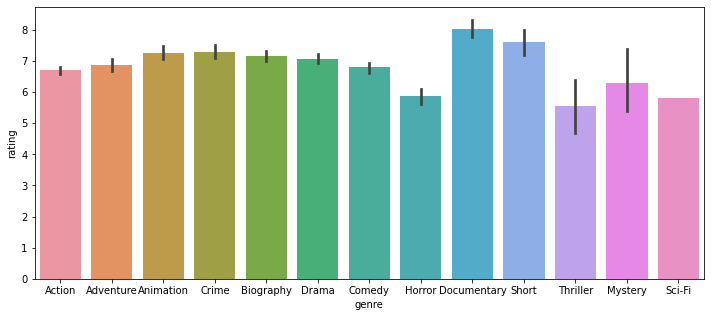

In [64]:
sns.barplot(x='genre',y='rating',data=df)

In [66]:
# #Which genre gets the most gross
# sns.barplot(x='gross',y='genre',data=df,palette="Blues_d")

In [67]:
#plotting using Pandas
df['genre'].value_counts()

Action         363
Drama          214
Comedy         195
Biography      104
Crime           89
Animation       77
Adventure       61
Horror          46
Documentary     23
Mystery          3
Short            2
Thriller         2
Sci-Fi           1
Name: genre, dtype: int64

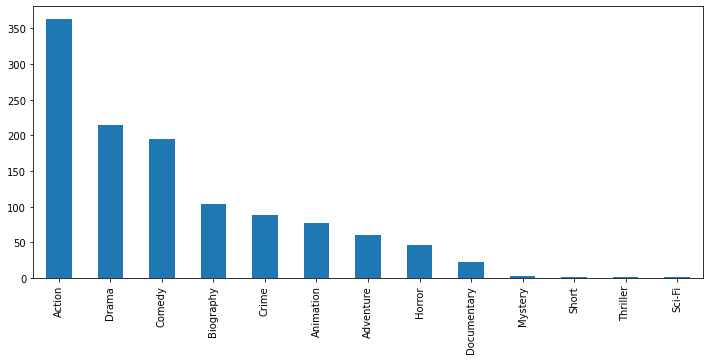

In [68]:
df['genre'].value_counts().plot.bar()

In [69]:
#How are the features related to each other?
print(df.corr())

            year    rating     votes
year    1.000000  0.017301 -0.044394
rating  0.017301  1.000000  0.239519
votes  -0.044394  0.239519  1.000000


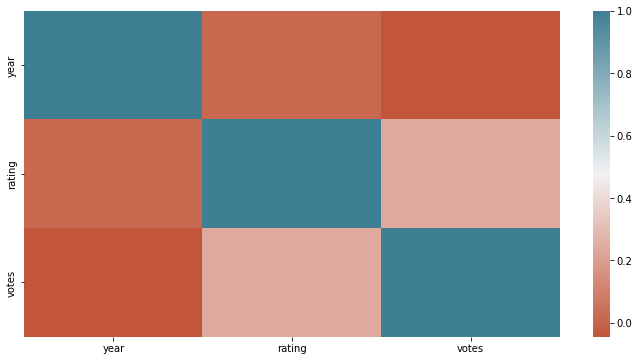

In [70]:
fig1, ax1=plt.subplots(figsize=(12,6))
sns.heatmap(df.corr(),cmap=sns.diverging_palette(20,220, as_cmap=True),ax=ax1)

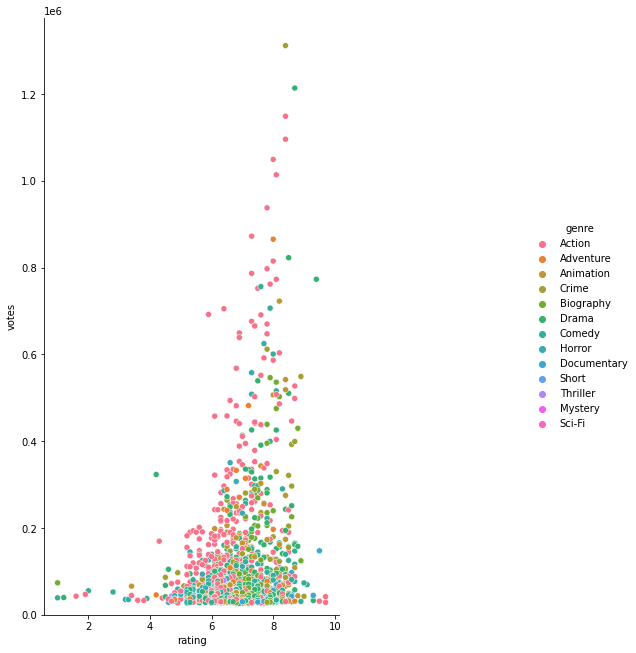

In [71]:
#high rated movies tend to attract more votes?
plot=sns.pairplot(x_vars="rating",y_vars="votes",hue="genre", data=df)
plot.set(ylim=(0,None))
plot.fig.set_size_inches(10,12)

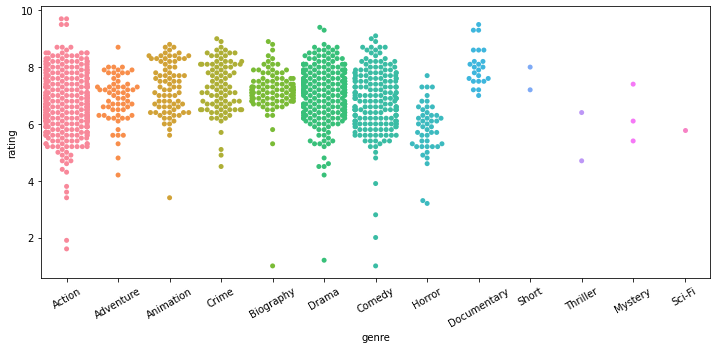

In [73]:
plot=sns.swarmplot(x="genre",y="rating",data=df)
_=plot.set_xticklabels(labels=plot.get_xticklabels(),rotation=30)

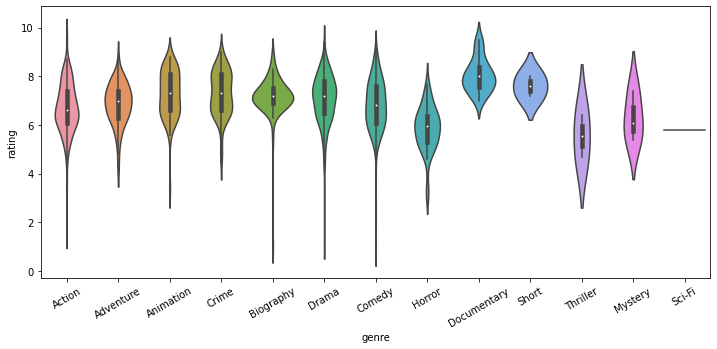

In [74]:
plot=sns.violinplot(x="genre",y="rating",data=df)
_=plot.set_xticklabels(labels=plot.get_xticklabels(),rotation=30)

In [75]:
#data cleaning, EDA and visualization
%matplotlib inline
import sys
import numpy as np

import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import time

sns.set()
pal=sns.hls_palette(10, h=.5)
sns.set_palette(pal)

#Avoid display of scientific notation and show precision of 4 decimals:
pd.set_option('display.float_format',lambda x: '%.4f' %x)

import warnings
warnings.filterwarnings("ignore")